In [ ]:
# 20250415 필기 !!!!

In [ ]:
# xml 형식!! : <property> d:code/config.... </property>
# yml 형식 !!
#  - name: d:code/config.... ; 들여쓰기가 있음 !!!
service:
  namenode:
    image: eh-hdfs:1.0
    container_name: namenode
    command : bash -c "service ssh start&& chown -R hadoop:hadoop /data/hadoop && && chmod -R 777"
                                            ㄴ 폴더에 권한을 주기 위함 !! //  / data : 공백 안 넣게 주의 !!! 잘못하면 실행이 안 됨 ㅠ

이거하고 docker compose up -d 하면 컨테이너 만들어짐 ~~ 와 최고!
참고로 dockerfile은 선생님 서버에서 긁어옴 ^_^

In [ ]:
접속은 cmd 열고 ssh hadoop@localhost -p (설정한 포트번호!!)

In [ ]:
모든 설정은 namenode에서 ~~! ^0^ㅋ

In [ ]:
ssh-keygen -t rsa

id_rsa id_rsa.pub ; 저 위의 명령어를 실행하면 밑의 폴더가 생김 !!!

***ssh-copy-id hadoop@namenode ; 본인에게도 공개키를 나눠줘야함 !!!

ssh-copy-id hadoop@datanode1
ssh-copy-id hadoop@datanode2
ssh-copy-id hadoop@datanode3

In [ ]:
~$의 기본 폴더에서 nano .bashrc를 치고 맨 밑에 입력할 것 !!
: 이건 윈도우의 환경변수를 입력해주는 것과 같은 거야~~!

export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64
export HADOOP_HOME=/home/hadoop/hadoop-3.4.1
export HADOOP_CONF_DIR=$HADOOP_HOME/etc/hadoop
export PATH=$PATH:$JAVA_HOME:$HADOOP_HOME/bin:$HADOOP_HOME/sbin

이후 cd $HADOOP_HOME/etc/hadoop로 이동!!!
nano hadoop-env.sh 치고 맨 아래로 가서 수정 !!!

export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64

In [ ]:
admin. ssh를 수정했을때, 
VScode의 왼쪽 아래에 보면 >< 되어있는 아이콘을 클릭 !! 해서 
호스트에 연결을 선택!!
호스트 구성을 눌러 C:\Users\Admin\.ssh\config 선택 !!!!

Host hadoop_ssh
    HostName localhost
    Port 2220
    User hadoop

요렇게 수정한 이후,
다시 왼쪽아래의 ><를 눌러서 호스트에 현재창 연결 선택 !!! 암호 누르고
탐색기의 폴더열기를 눌러서 폴더 경로 /home/hadoop 그대로 확인 눌러!!!
이후 HADOOP의 etc에 core-site.xml를 수정하면 됨 ~~
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://namenode:9000</value>
  </property>
  <property>
    <name>hadoop.tmp.dir</name>
    <value>/data/hadoop/tmp</value>
  </property> 
</configuration>
; configuration 사이에 property 추가 !!!

이후 hdfs-site.xml 수정

<configuration>
  <property>
    <name>dfs.replication</name>
    <value>3</value>
  </property>
  <property>
    <name>dfs.namenode.name.dir</name>
    <value>file:/data/hadoop/dfs/name</value>
    <final>true</final>
  </property>
  <property>
    <name>dfs.datanode.data.dir</name>
    <value>file:/data/hadoop/dfs/data</value>
    <final>true</final>
  </property>
  <property>
    <name>dfs.permissions</name>
    <value>true</value>
  </property>
</configuration>

이후 mapred-site.xml 수정
configuration>
  <property>
    <name>mapreduce.framework.name</name>
    <value>yarn</value>
  </property>
  <property>
    <name>mapred.local.dir</name>
    <value>/data/hadoop/hdfs/mapred</value>
  </property>
  <property>
    <name>mapred.system.dir</name>
    <value>/data/hadoop/hdfs/mapred</value>
  </property>
  <property>
    <name>yarn.app.mapreduce.am.env</name>
    <value>HADOOP_MAPRED_HOME=$HADOOP_HOME</value>
  </property>
  <property>
    <name>mapreduce.map.env</name>
    <value>HADOOP_MAPRED_HOME=$HADOOP_HOME</value>
  </property>
  <property>
    <name>mapreduce.reduce.env</name>
    <value>HADOOP_MAPRED_HOME=$HADOOP_HOME</value>
  </property>

</configuration>

이후 yarn-site.xml 수정
<configuration>

<!-- Site specific YARN configuration properties -->
  <property>
    <name>yarn.nodemanager.aux-services</name>
    <value>mapreduce_shuffle</value>
  </property>
  <property>
    <name>yarn.nodemanager.aux-services.mapreduce_shuffle.class</name>
    <value>org.apache.hadoop.mapred.ShuffleHandler</value>
  </property>
  <property>
    <name>yarn.resourcemanager.resource-tracker.address</name>
    <value>namenode:8025</value>
  </property>
  <property>
    <name>yarn.resourcemanager.scheduler.address</name>
    <value>namenode:8030</value>
  </property>
  <property>
    <name>yarn.resourcemanager.address</name>
    <value>namenode:8035</value>
  <property>
</configuration>

이후 worker파일에 datanode1 \n datanode2 \n datanode3 추가!! 


In [ ]:
# ~~~ 점심 먹고~~~ #

In [ ]:
[ssh copy] ; 전부 namenode 사용자에 실행시킬것!!!!!!!
scp -r /home/hadoop/hadoop-3.4.1/etc/hadoop/* hadoop@datanode1:/home/hadoop/hadoop-3.4.1/etc/hadoop/
scp -r /home/hadoop/hadoop-3.4.1/etc/hadoop/* hadoop@datanode2:/home/hadoop/hadoop-3.4.1/etc/hadoop/
scp -r /home/hadoop/hadoop-3.4.1/etc/hadoop/* hadoop@datanode3:/home/hadoop/hadoop-3.4.1/etc/hadoop/


In [ ]:
# 각 노드에 폴더를 생성(도커컴포즈로 생략 가능~)
# sudo mkdir -p /data/hadoop/tmp
# sudo mkdir -p /data/hadoop/dfs/name
# sudo mkdir -p /data/hadoop/dfs/data
# sudo chown -R hadoop:hadoop /data/hadoop

In [ ]:
처음으로 namenode 포맷 !!!
hadoop namenode -format

start-all.sh
stop-all.sh

In [ ]:
hdfs dfs -mkdir -p /user/hadoop
hdfs dfs -chmod 777 /user/hadoop ; 설정 끝!!!!!!!!!!!!!!!! 

In [ ]:
# 이렇게 떠야해 !!!

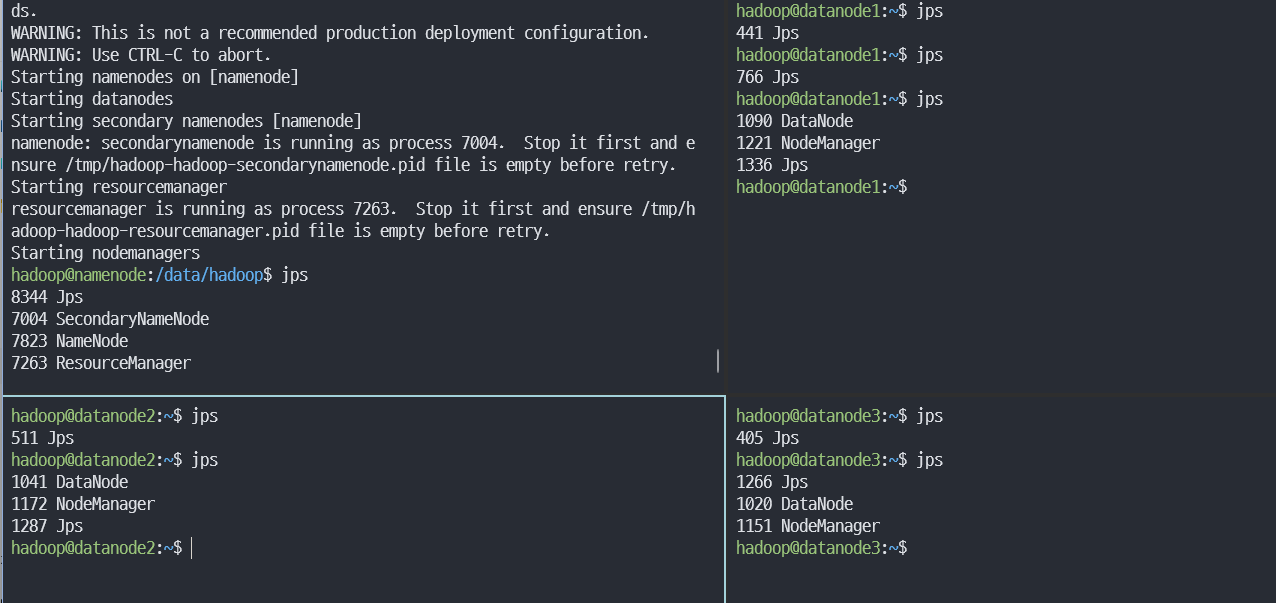

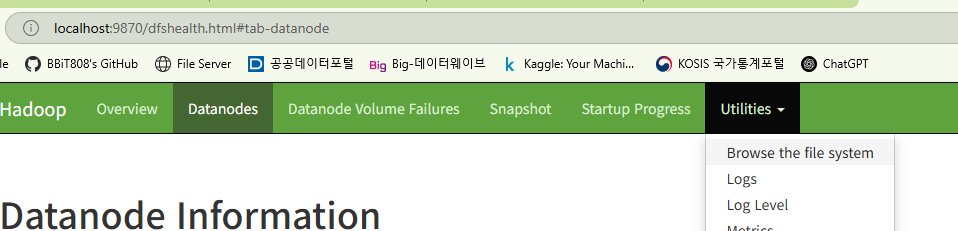

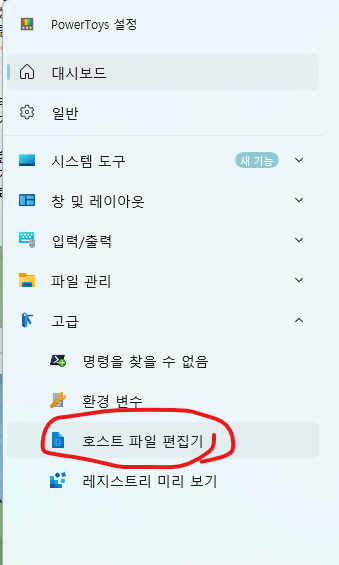

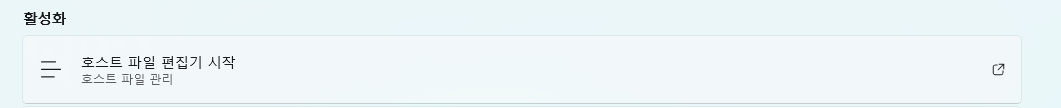

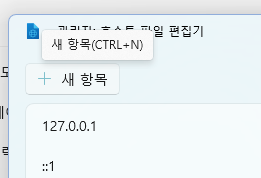

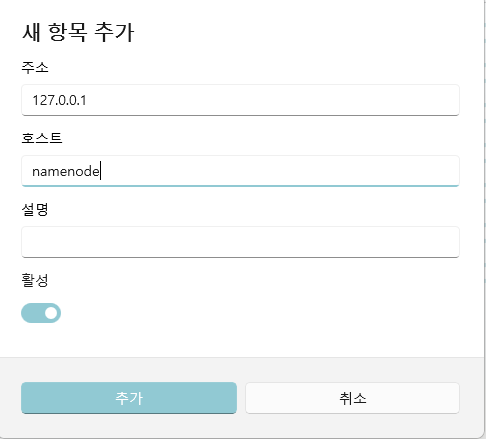

In [ ]:
같은 방식으로 datanode1/2/3/도 추가해줄것!!

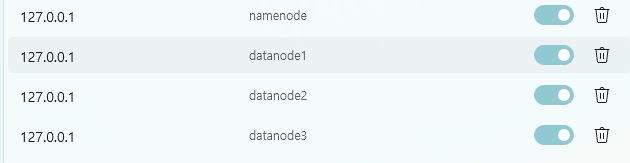

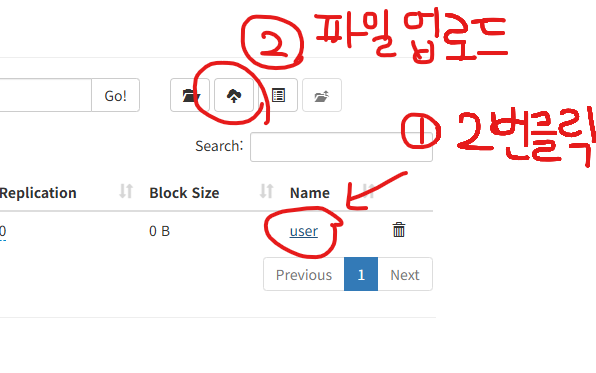

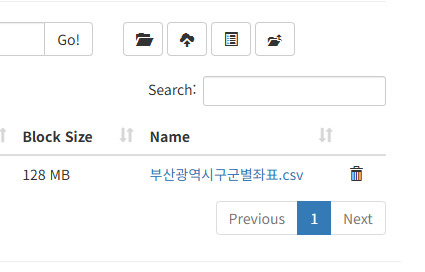

In [ ]:
# 셋팅 끝~~~~~ ^0^

In [ ]:
# ~~~ namenode에 이어서~~~

In [ ]:
df -h 눌러서 확인해보기~
hdfs dfs -ls ; 업로드 된 파일 확인할 수 있음 !!

hdfs dfs -ls -R /user/hadoop ; 이 폴더 안을 읽고 싶어요!
hdfs dfs -cat /user/hadoop/starbucks_20250411123612.csv ; 이 파일을 읽고 싶어요~

hdfs dfs -put ./LICENSE.txt /user/hadoop ; License.txt 파일을 user hadoop 폴더/ 브라우저에도 올리고 싶어요~(업로드)
 hdfs dfs -get /user/hadoop/LICENSE.txt LICENSE2.txt ; 저 폴더 안의 파일의 이름을 변경해서 가져오고 싶어요~(다운로드)

hdfs dfs -put ./LICENSE2.txt /user/hadoop 저 LICENSE2.txt를 브라우저에도 올리고 싶어요~(업로드)
hdfs dfs -rm /user/hadoop/LICENSE2.txt 저 파일을 여기에서 삭제하고 싶어요~(삭제)

hdfs dfs -mkdir /user/mydata ; 폴더 생성하고 싶어요~
hdfs dfs -chmod 777 /user/mydata ; 권한을 부여하고 싶어요~